## Introduction

This is a **final portfolio project** and it is a part of my Data Analyst Career Path from Codecademy. More information [here](https://www.codecademy.com/learn/paths/data-analyst)

## About Data

The data set `marketing_data.csv` consists of 2,240 customers of XYZ company with data on:

- Customer profiles
- Product preferences
- Campaign successes/failures
- Channel performance

The data for this project was downloaded from [Kaggle](https://www.kaggle.com/jackdaoud/marketing-data)

## Business Analysis with EDA & Statistics

#### Task Details

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

#### Section 01: Exploratory Data Analysis

* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

#### Section 02: Statistical Analysis

* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test. 
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
* Is there a significant relationship between geographical regional and success of a campaign?

#### Section 03: Data Visualization

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?

#### Section 04: CMO Recommendations

Bring together everything from Sections 01 to 03 and provide data-driven recommendations/suggestions to your CMO.

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline


# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

## Load and View the Data

In [2]:
data = pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
data.shape

(2240, 28)

In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
data.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [6]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Summary:** 

Some immediate insights are:

* There are `28` columns and `2240` rows.
* The name and datatype of each column - most values are integers in this dataset.
* The income column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA.
* The column names could be renamed for more consistency.

## Clean the Data

As mentioned before, the `Income` column could use some cleaning.

In [8]:
# clean up column names that contain whitespace

data.columns = data.columns.str.replace(' ', '')

In [9]:
# transform Income column to a numerical

data['Income'] = data['Income'].replace('[\$,]', '', regex=True).astype(float)

Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension.

In [10]:
# put all columns into snake case format

data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in data.columns]

In [11]:
data.head()

,i_d,year__birth,education,marital__status,income,kidhome,teenhome,dt__customer,recency,mnt_wines,...,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [12]:
data.columns

Index(['i_d', 'year__birth', 'education', 'marital__status', 'income',
       'kidhome', 'teenhome', 'dt__customer', 'recency', 'mnt_wines',
       'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products',
       'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'num_web_visits_month', 'accepted_cmp3', 'accepted_cmp4',
       'accepted_cmp5', 'accepted_cmp1', 'accepted_cmp2', 'response',
       'complain', 'country'],
      dtype='object')

Further columns cleaning will be needed to delete extra underscore sign. 

In [13]:
data = data.rename(columns={
    'i_d': 'id',
    'year__birth': 'year_birth',
    'marital__status': 'marital_status',
    'dt__customer': 'dt_customer'})

In [14]:
data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')

In [15]:
data.dtypes

id                         int64
year_birth                 int64
education                 object
marital_status            object
income                   float64
kidhome                    int64
teenhome                   int64
dt_customer               object
recency                    int64
mnt_wines                  int64
mnt_fruits                 int64
mnt_meat_products          int64
mnt_fish_products          int64
mnt_sweet_products         int64
mnt_gold_prods             int64
num_deals_purchases        int64
num_web_purchases          int64
num_catalog_purchases      int64
num_store_purchases        int64
num_web_visits_month       int64
accepted_cmp3              int64
accepted_cmp4              int64
accepted_cmp5              int64
accepted_cmp1              int64
accepted_cmp2              int64
response                   int64
complain                   int64
country                   object
dtype: object

After cleaning columns and dealing with income column, below is a heatmap of correlation which shows us relationship between variables.

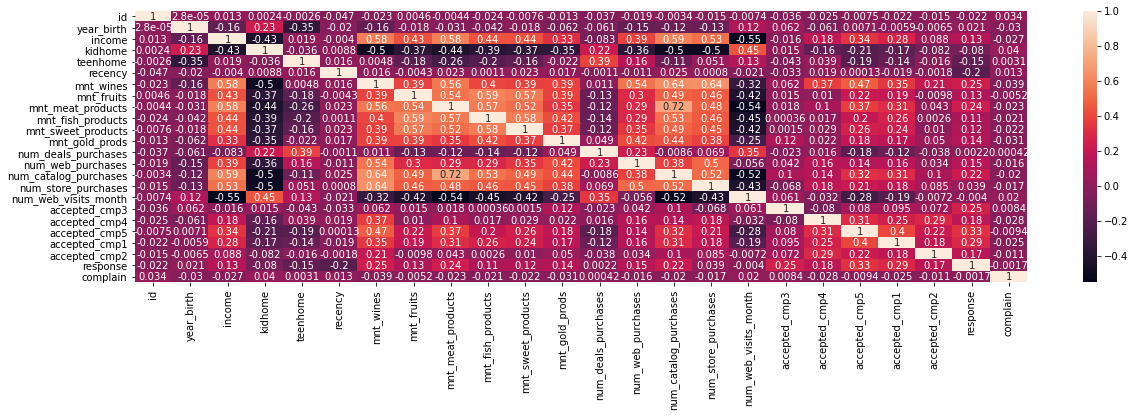

In [16]:
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Summary:** 

* Income column were cleaned. The dollar sign was removed and the column has now a float type. 
* All others columns names were renamed for more consistency.

## Section 01: Exploratory Data Analysis

#### Are there any null values or outliers? How will you wrangle/handle them?

Identify features containing `null values`.

In [17]:
data.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
response                  0
complain                  0
country                   0
dtype: int64

As we can see only **income** column has null values.

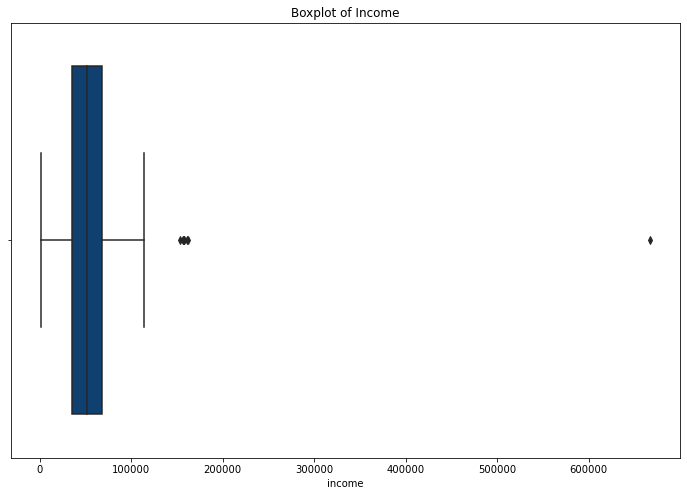

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='income', palette='ocean')
plt.title('Boxplot of Income')
plt.show()

The boxplot above shows the major outlier on the right. It will be much better for further analysis to remove it.

In [19]:
# include income below 30000

data = data[data['income']<300000]

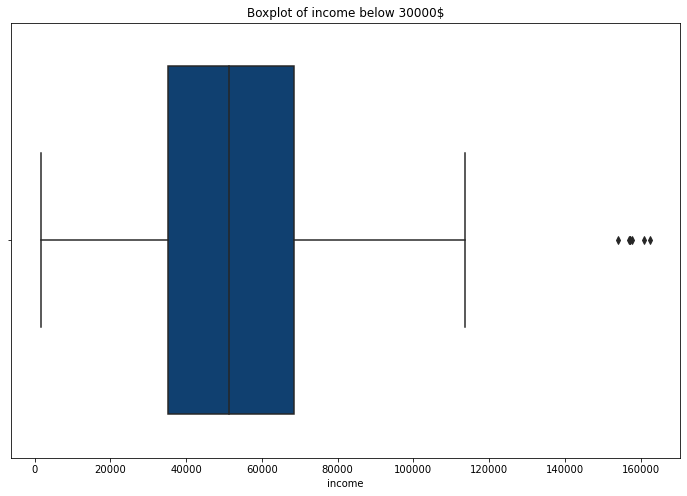

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='income', palette='ocean')
plt.title('Boxplot of income below 30000$')
plt.show()

After removing the outlier, the distribution is more symmetric.

There are still some outliers; however, with not major skewness or huge outliers remaining.

The missing values are replaced with the `mean income` using the mean() method

In [21]:
# replace missing values with the mean income

data['income'] = data['income'].fillna(data['income'].mean())

In [22]:
data['income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

I would like to look closer at `year_birth` and `education` column. Both of them could be used by me in further analysis in this project. They are also seems to be interesting because buying preferences seems to be connected with customer education level and year of birth.  

The `data` DataFrame contains a `year_birth` column; however, a column with the `age` of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of year_birth from 2020 (the year the dataset is from)
* Any outliers in age that could affect the analysis are removed

In [23]:
data['age'] = 2020 - data['year_birth']

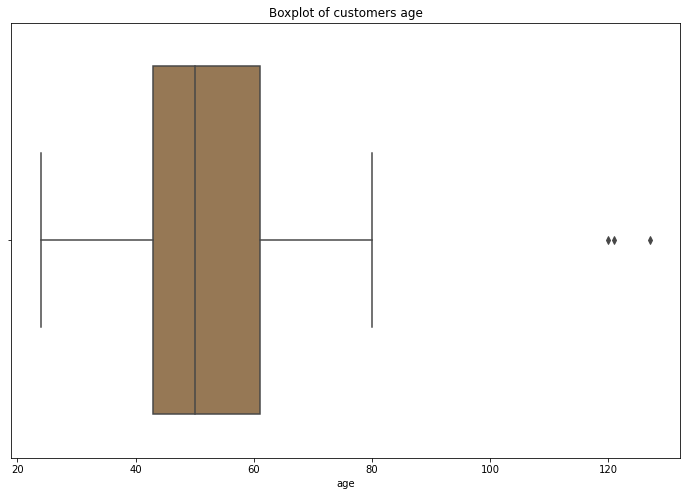

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='age', palette='cubehelix')
plt.title('Boxplot of customers age')
plt.show()

As we can see there are few outliers, which mean that in our dataset exists people with more that 100 years, so next step will be removed this outliers. 

In [25]:
# include age below 100 

data = data[data['age']<100]

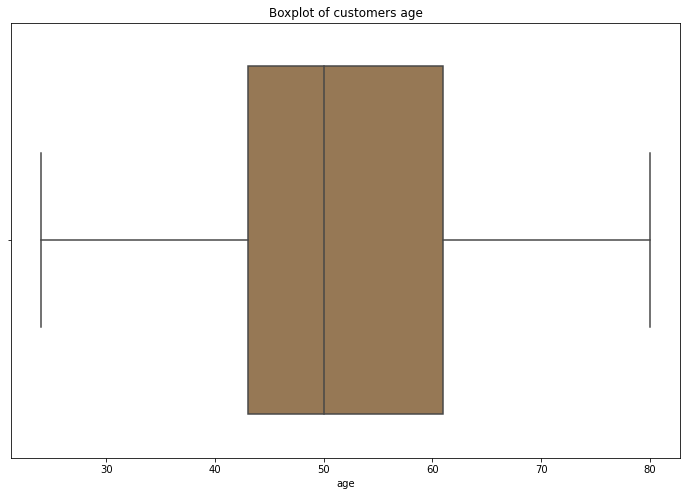

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='age', palette='cubehelix')
plt.title('Boxplot of customers age')
plt.show()

`education` column - a boxplot is used to see if any cleaning is needed. 

In [27]:
data['education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

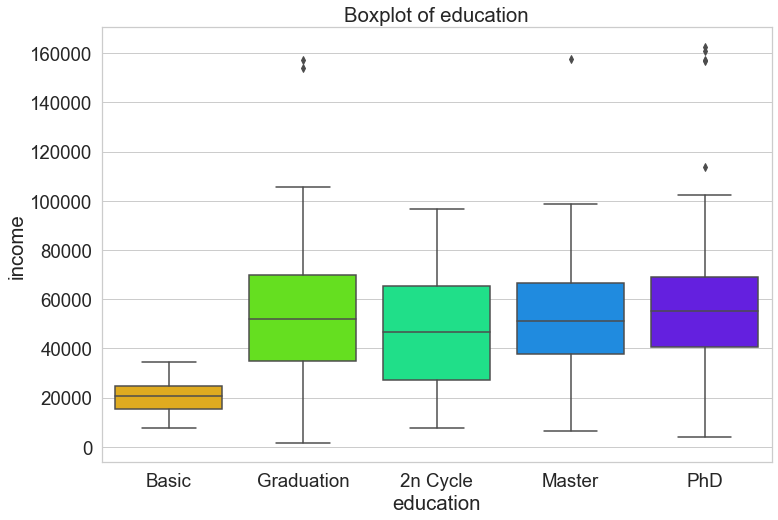

In [28]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.set_context('notebook', 1.7)
sns.boxplot(data=data, x='education', y='income', palette='gist_rainbow',
           order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.title('Boxplot of education')
plt.show()

There is no missing data or other issues, so `education` column can be left as is.

I will plot variables to visualize the distribution of the data and identify any outliers or imbalanced classes.

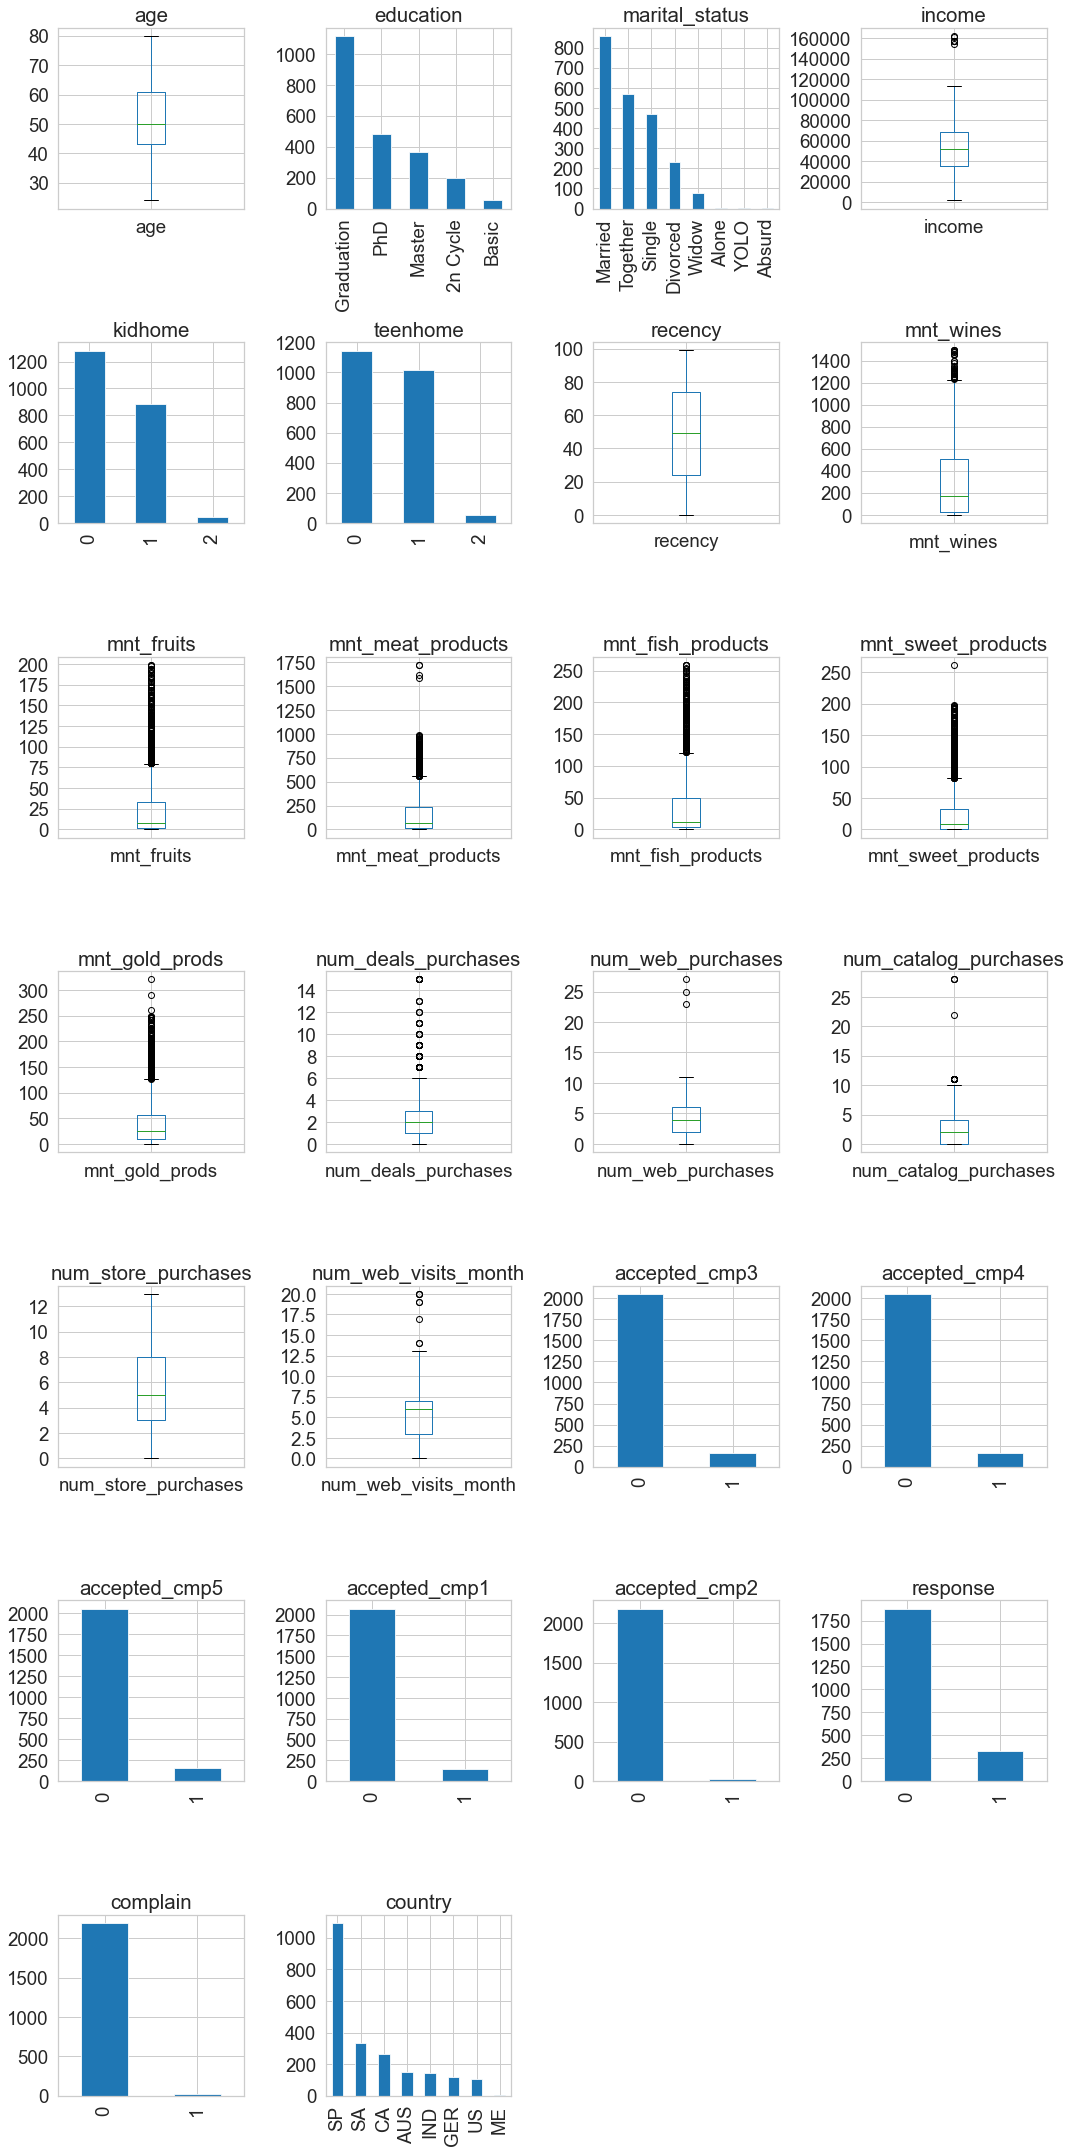

In [29]:
f, axs = plt.subplots(7,4,figsize=(15,30))
sns.set_style('whitegrid')
sns.set_context('paper')

data['age'].plot(kind='box', ax=axs[0,0])
axs[0,0].title.set_text('age')

data['education'].value_counts().plot(kind='bar',ax=axs[0,1])
axs[0,1].title.set_text('education')

data['marital_status'].value_counts().plot(kind='bar',ax=axs[0,2])
axs[0,2].title.set_text('marital_status')

data['income'].plot(kind='box', ax=axs[0,3])
axs[0,3].title.set_text('income')

data['kidhome'].value_counts().plot(kind='bar',ax=axs[1,0])
axs[1,0].title.set_text('kidhome')

data['teenhome'].value_counts().plot(kind='bar',ax=axs[1,1])
axs[1,1].title.set_text('teenhome')

data['recency'].plot(kind='box', ax=axs[1,2])
axs[1,2].title.set_text('recency')

data['mnt_wines'].plot(kind='box', ax=axs[1,3])
axs[1,3].title.set_text('mnt_wines')

data['mnt_fruits'].plot(kind='box', ax=axs[2,0])
axs[2,0].title.set_text('mnt_fruits')

data['mnt_meat_products'].plot(kind='box', ax=axs[2,1])
axs[2,1].title.set_text('mnt_meat_products')

data['mnt_fish_products'].plot(kind='box', ax=axs[2,2])
axs[2,2].title.set_text('mnt_fish_products')

data['mnt_sweet_products'].plot(kind='box', ax=axs[2,3])
axs[2,3].title.set_text('mnt_sweet_products')

data['mnt_gold_prods'].plot(kind='box', ax=axs[3,0])
axs[3,0].title.set_text('mnt_gold_prods')

data['num_deals_purchases'].plot(kind='box', ax=axs[3,1])
axs[3,1].title.set_text('num_deals_purchases')

data['num_web_purchases'].plot(kind='box', ax=axs[3,2])
axs[3,2].title.set_text('num_web_purchases')

data['num_catalog_purchases'].plot(kind='box', ax=axs[3,3])
axs[3,3].title.set_text('num_catalog_purchases')

data['num_store_purchases'].plot(kind='box', ax=axs[4,0])
axs[4,0].title.set_text('num_store_purchases')

data['num_web_visits_month'].plot(kind='box', ax=axs[4,1])
axs[4,1].title.set_text('num_web_visits_month')

data['accepted_cmp3'].value_counts().plot(kind='bar',ax=axs[4,2])
axs[4,2].title.set_text('accepted_cmp3')

data['accepted_cmp4'].value_counts().plot(kind='bar',ax=axs[4,3])
axs[4,3].title.set_text('accepted_cmp4')

data['accepted_cmp5'].value_counts().plot(kind='bar',ax=axs[5,0])
axs[5,0].title.set_text('accepted_cmp5')

data['accepted_cmp1'].value_counts().plot(kind='bar',ax=axs[5,1])
axs[5,1].title.set_text('accepted_cmp1')

data['accepted_cmp2'].value_counts().plot(kind='bar',ax=axs[5,2])
axs[5,2].title.set_text('accepted_cmp2')

data['response'].value_counts().plot(kind='bar',ax=axs[5,3])
axs[5,3].title.set_text('response')

data['complain'].value_counts().plot(kind='bar',ax=axs[6,0])
axs[6,0].title.set_text('complain')

data['country'].value_counts().plot(kind='bar',ax=axs[6,1])
axs[6,1].title.set_text('country')

f.delaxes(axs[6][2])
f.delaxes(axs[6][3])
f.tight_layout()
plt.show()

#### Are there any variables that warrant transformations?

In [30]:
data['dt_customer'].head()

0    6/16/14
1    6/15/14
2    5/13/14
3    5/11/14
4     4/8/14
Name: dt_customer, dtype: object

`dt_customer` is a datatype column and it should be transformed to datetime format as this will improve the readability of this column 

In [31]:
data['dt_customer'] = pd.to_datetime(data['dt_customer'])

In [32]:
data['dt_customer'].head()

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: dt_customer, dtype: datetime64[ns]

#### Are there any useful variables that you can engineer with the given data?

* Review a list of the feature names below:

    * The total number of dependents in the home ('dependents') can be engineered from the sum of 'kidhome' and 'teenhome'
    * The year of becoming a customer ('year_customer') can be engineered from 'dt_customer'
    * The total amount spent ('total_mnt') can be engineered from the sum of all features containing the keyword `'mnt'`
    * The total purchases ('total_purchases') can be engineered from the sum of all features containing the keyword `'purchases'`
    * The total number of campains accepted ('total_cam_acc') can be engineered from the sum of all features containing the keywords `'cmp'` and `'response'` (the latest campaign)
    * Further work with column `age`. I can split this column and create a new one splitting age by age groups: `age_groups`

In [33]:
data['dependents'] = data['kidhome'] + data['teenhome']

In [34]:
data['year_customer'] = pd.DatetimeIndex(data['dt_customer']).year

In [35]:
mnt_cols = [col for col in data.columns if 'mnt' in col]

data['total_mnt'] = data[mnt_cols].sum(axis=1)

In [36]:
purchases_cols = [col for col in data.columns if 'purchases' in col]

data['total_purchases'] = data[purchases_cols].sum(axis=1)

In [37]:
cam_cols = [col for col in data.columns if 'cmp' in col] + ['response']

data['total_cam_acc'] = data[cam_cols].sum(axis=1)

In [38]:
def age_group(age):
    if age <= 19:
        return 'Teenengers'
    elif 20 < age <= 29:
        return '20 to 29'
    elif 30 < age <= 39:
        return '30 to 39'
    elif 40 < age <= 49:
        return '40 to 49'
    elif 50 < age <= 59:
        return '50 to 59'
    elif 60 < age <= 69:
        return '60 to 69'
    else:
        return '70 and Older'
    
    
data['age_groups'] = data['age'].apply(age_group)

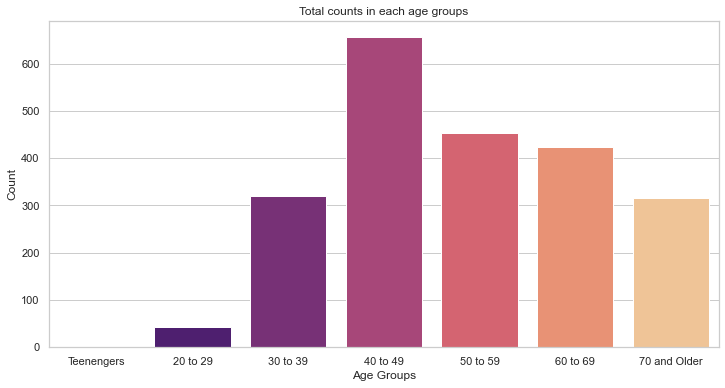

In [39]:
plt.figure(figsize=(12,6))
sns.set_context('notebook', 1)

sns.countplot(data['age_groups'], order=['Teenengers', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69',
                                         '70 and Older'], palette='magma')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Total counts in each age groups')
plt.show()

Now, take a look of new features. 

In [40]:
data[['dependents', 'year_customer', 'total_mnt', 'total_purchases', 'total_cam_acc', 'age_groups']].head()

,dependents,year_customer,total_mnt,total_purchases,total_cam_acc,age_groups
0,0,2014,1190,15,1,70 and Older
1,0,2014,577,18,2,50 to 59
2,1,2014,251,11,0,60 to 69
3,2,2014,11,4,0,50 to 59
4,1,2014,91,8,2,30 to 39


#### Do you notice any patterns or anomalies in the data? Can you plot them?

* First I will look closer at `mnt` type columns:
    * mnt_wines                 
    * mnt_fruits                
    * mnt_meat_products         
    * mnt_fish_products        
    * mnt_sweet_products        
    * mnt_gold_prods        

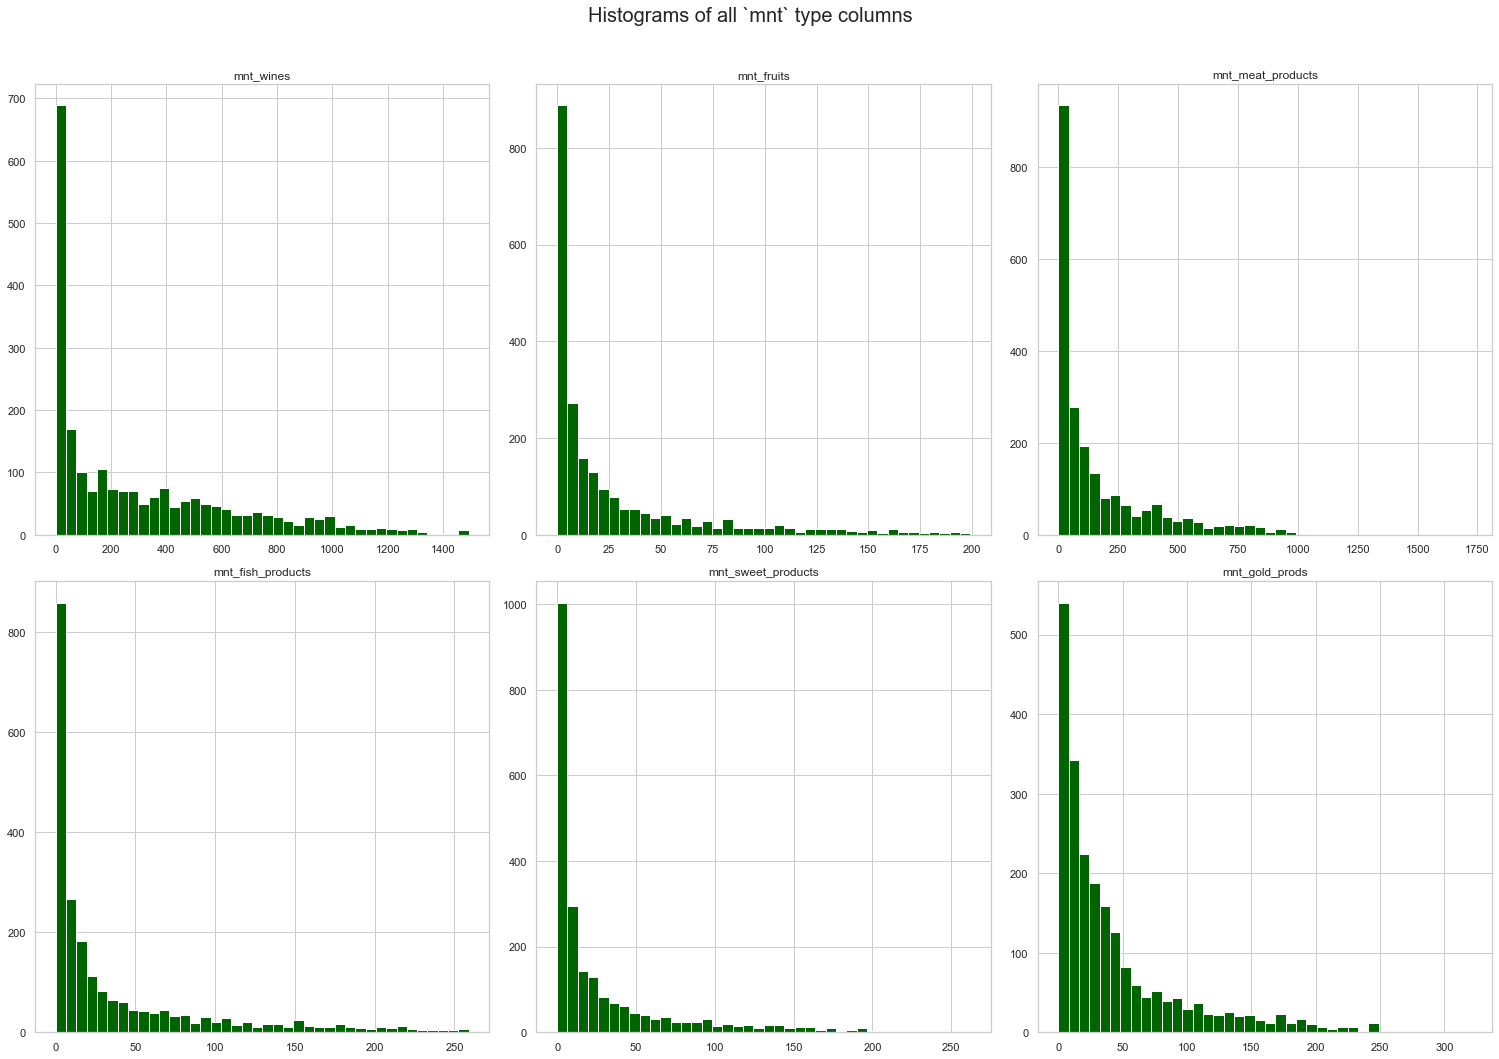

In [41]:
f, axs = plt.subplots(2,3,figsize=(21,14))
sns.set_style('whitegrid')
sns.set_context('notebook', 1)

axs[0][0].hist(data['mnt_wines'], bins=40, color='DarkGreen')
axs[0][0].set(title='mnt_wines')

axs[0][1].hist(data['mnt_fruits'], bins=40, color='DarkGreen')
axs[0][1].set(title='mnt_fruits')

axs[0][2].hist(data['mnt_meat_products'], bins=40, color='DarkGreen')
axs[0][2].set(title='mnt_meat_products')

axs[1][0].hist(data['mnt_fish_products'], bins=40, color='DarkGreen')
axs[1][0].set(title='mnt_fish_products')

axs[1][1].hist(data['mnt_sweet_products'], bins=40, color='DarkGreen')
axs[1][1].set(title='mnt_sweet_products')

axs[1][2].hist(data['mnt_gold_prods'], bins=40, color='DarkGreen')
axs[1][2].set(title='mnt_gold_prods')

f.tight_layout()
plt.suptitle('Histograms of all `mnt` type columns', y=1.05, fontsize=20)
plt.show()

All `mnt` columns are `right-skewed` and has a peak that is left of center and a more gradual tapering to the right side of the graph. Dataset has a long right tail also called positive-skew distributions. That's because there is a long tail in the positive direction on the number line. This is a unimodal data set, with the mean higher than the median.

* Secondly I will look closer at `num` type columns:
    * num_deals_purchases     
    * num_web_purchases         
    * num_catalog_purchases     
    * num_store_purchases       
    * num_web_visits_month

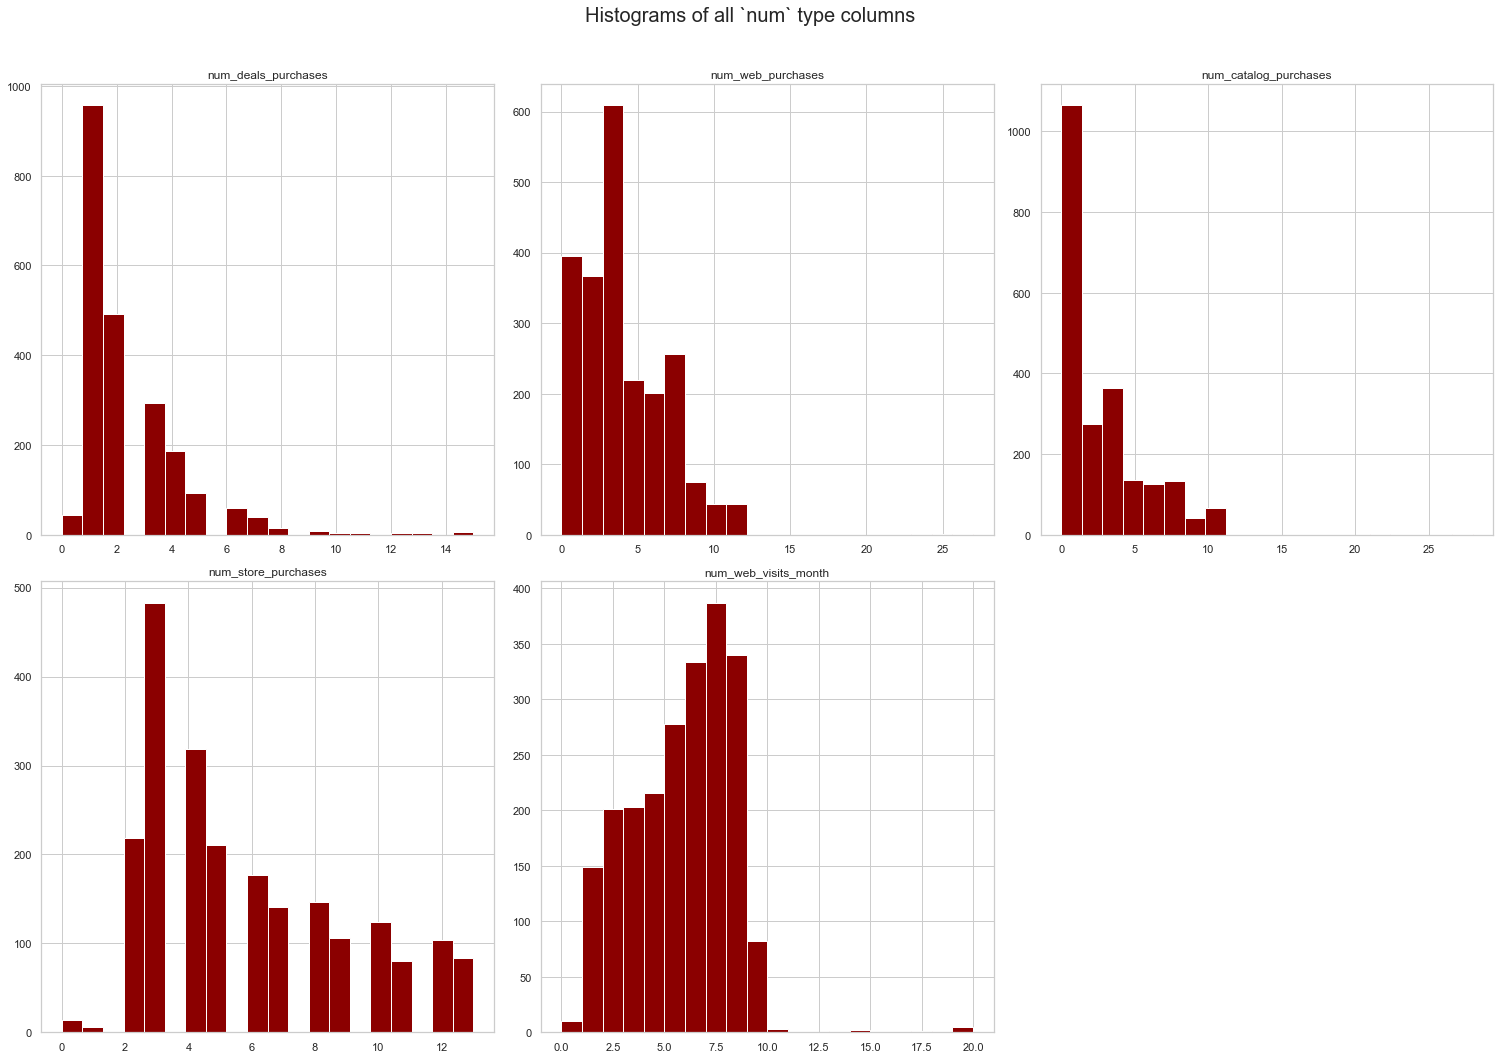

In [42]:
f, axs = plt.subplots(2,3,figsize=(21,14))
sns.set_style('whitegrid')
sns.set_context('notebook', 1)

axs[0][0].hist(data['num_deals_purchases'], bins=20, color='DarkRed')
axs[0][0].set(title='num_deals_purchases')

axs[0][1].hist(data['num_web_purchases'], bins=20, color='DarkRed')
axs[0][1].set(title='num_web_purchases')

axs[0][2].hist(data['num_catalog_purchases'], bins=20, color='DarkRed')
axs[0][2].set(title='num_catalog_purchases')

axs[1][0].hist(data['num_store_purchases'], bins=20, color='DarkRed')
axs[1][0].set(title='num_store_purchases')

axs[1][1].hist(data['num_web_visits_month'], bins=20, color='DarkRed')
axs[1][1].set(title='num_web_visits_month')


f.delaxes(axs[1][2])
f.tight_layout()
plt.suptitle('Histograms of all `num` type columns', y=1.05, fontsize=20)
plt.show()

As we can see all `num` columns are also `right-skewed`. Dataset contains some outliers which were also visible at boxplots in previous section.

* Lastly I would like to look closer at `marital_status` and `country` columns, because as shown befor those two can contains some anomalies

In [43]:
data['marital_status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64

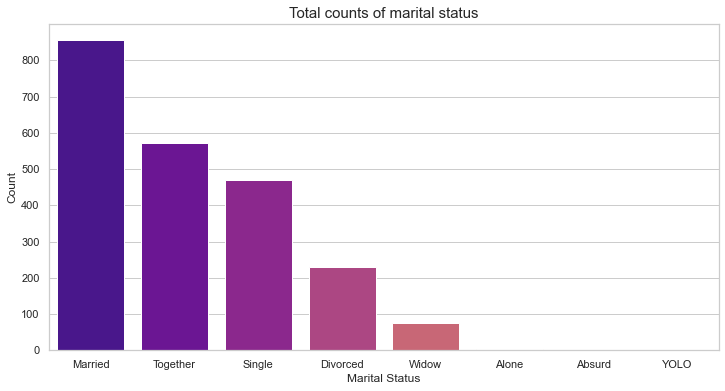

In [44]:
plt.figure(figsize=(12,6))
sns.set_context('notebook', 1)

sns.countplot(data['marital_status'], order=['Married', 'Together', 'Single', 'Divorced', 'Widow', 'Alone',
                                         'Absurd', 'YOLO'], palette='plasma')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Total counts of marital status', fontsize=15)
plt.show()

`marital_status`: there are 3 categories 'Alone', 'YOLO' and 'Absurd' which are not valid marital statuses, with very low number of customers in each.

In [45]:
data['country'].value_counts()

SP     1092
SA      335
CA      266
AUS     147
IND     146
GER     116
US      107
ME        3
Name: country, dtype: int64

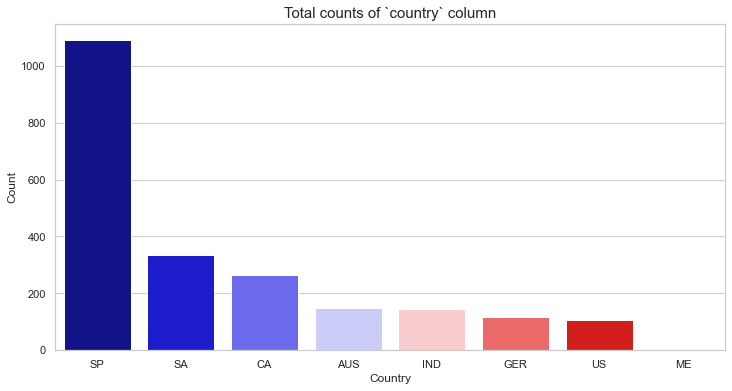

In [46]:
plt.figure(figsize=(12,6))
sns.set_context('notebook', 1)

sns.countplot(data['country'], order=['SP', 'SA', 'CA', 'AUS', 'IND', 'GER',
                                         'US', 'ME'], palette='seismic')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Total counts of `country` column', fontsize=15)
plt.show()

`country`: there are only 3 entries for customers from Mexico, and this may skew results related to this variable.

I already in all plots above tried to show where exists anomalies and tried to find some patterns. To better vizualized the exsisting patters in our dataset and to also shows new created columns I will look again at correlations. This time instead of heatmap I will use `clustermap`.  

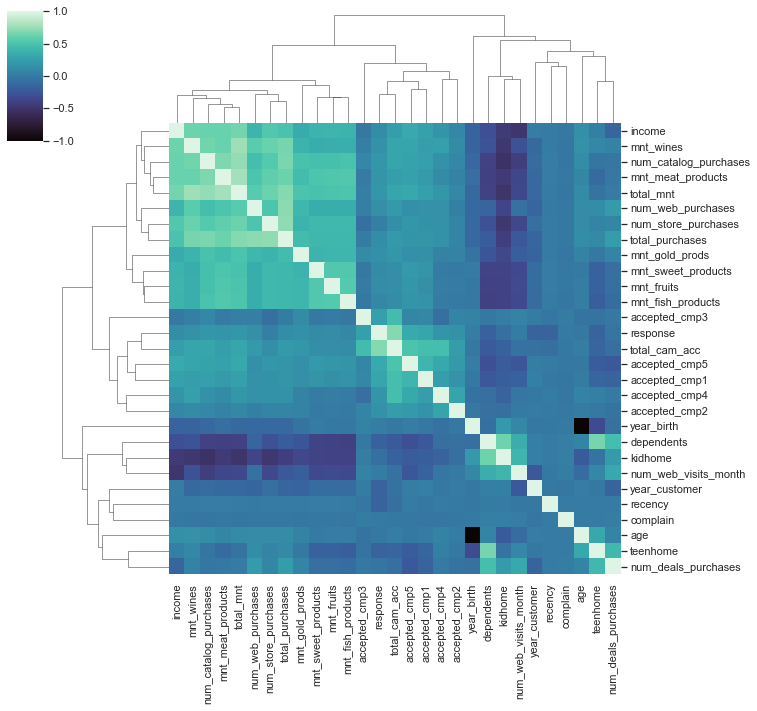

In [47]:
corrs = data.drop(columns='id').select_dtypes(include=np.number).corr(method = 'kendall')

sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='mako', center=0);

Based on that clustermap I can show:

_Plot illustrating the effect of high income on spending_

<Figure size 864x432 with 0 Axes>

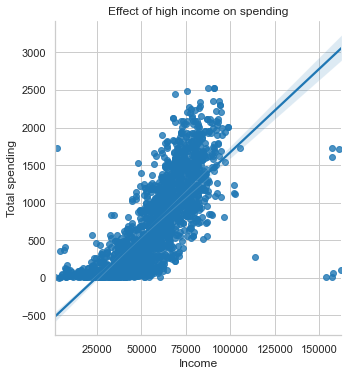

In [48]:
plt.figure(figsize=(12,6))
sns.lmplot(x='income', y='total_mnt', data=data)
plt.xlabel('Income')
plt.ylabel('Total spending')
plt.title('Effect of high income on spending')
plt.show()

_Plot illustrating negative effect of having dependents (kids & teens) on spending_

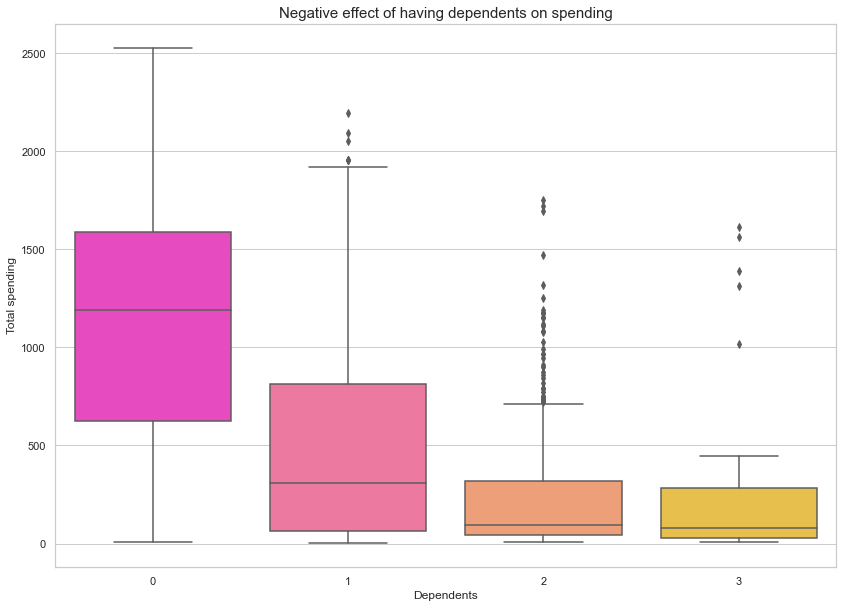

In [49]:
plt.figure(figsize=(14,10))
sns.boxplot(x='dependents', y='total_mnt', data=data, palette='spring')
plt.xlabel('Dependents')
plt.ylabel('Total spending')
plt.title('Negative effect of having dependents on spending', fontsize=15)
plt.show()

_Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased_

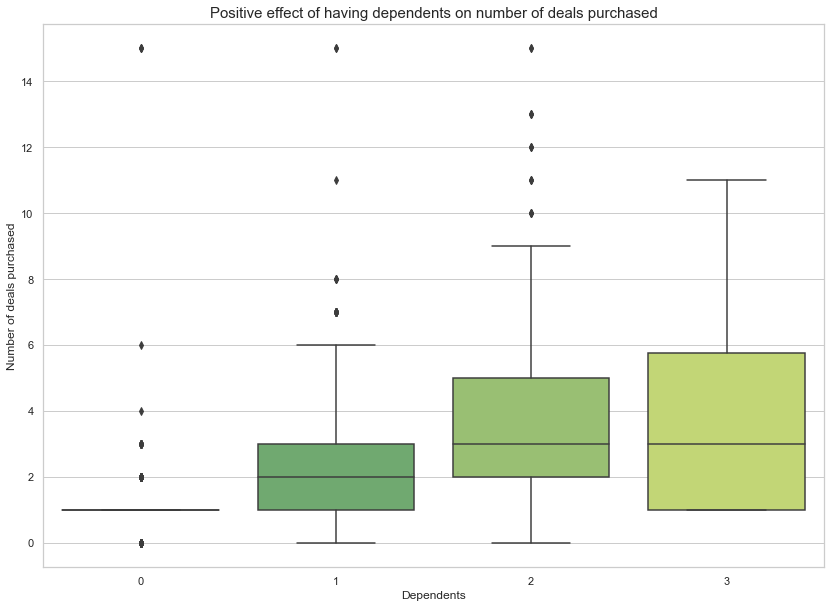

In [50]:
plt.figure(figsize=(14,10))
sns.boxplot(x='dependents', y='num_deals_purchases', data=data, palette='summer')
plt.xlabel('Dependents')
plt.ylabel('Number of deals purchased')
plt.title('Positive effect of having dependents on number of deals purchased', fontsize=15)
plt.show()

_Plots illustrating the positive effect of income on advertising campaign acceptance_

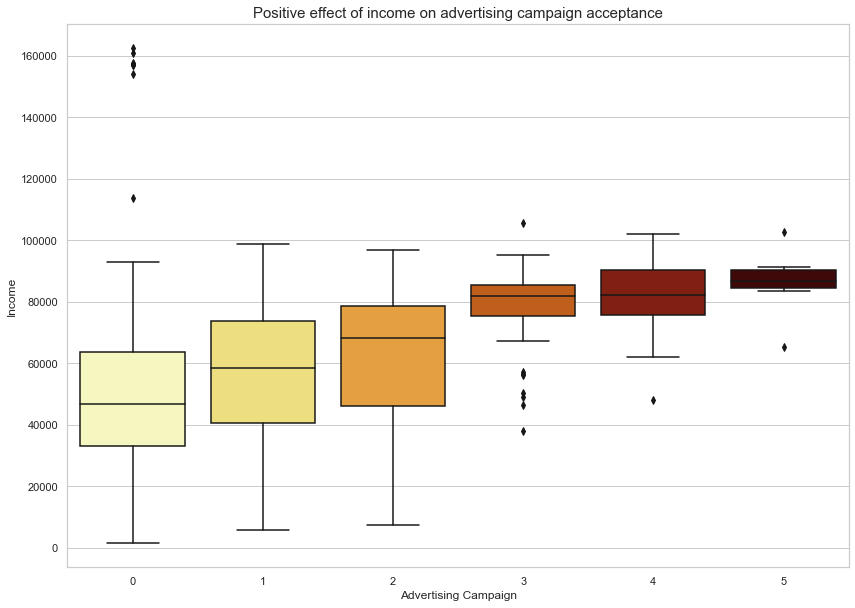

In [51]:
plt.figure(figsize=(14,10))
sns.boxplot(x='total_cam_acc', y='income', data=data, palette='afmhot_r')
plt.xlabel('Advertising Campaign')
plt.ylabel('Income')
plt.title('Positive effect of income on advertising campaign acceptance', fontsize=15)
plt.show()

_Plots illustrating the negative effect of having kids & teens on advertising campaign acceptance_

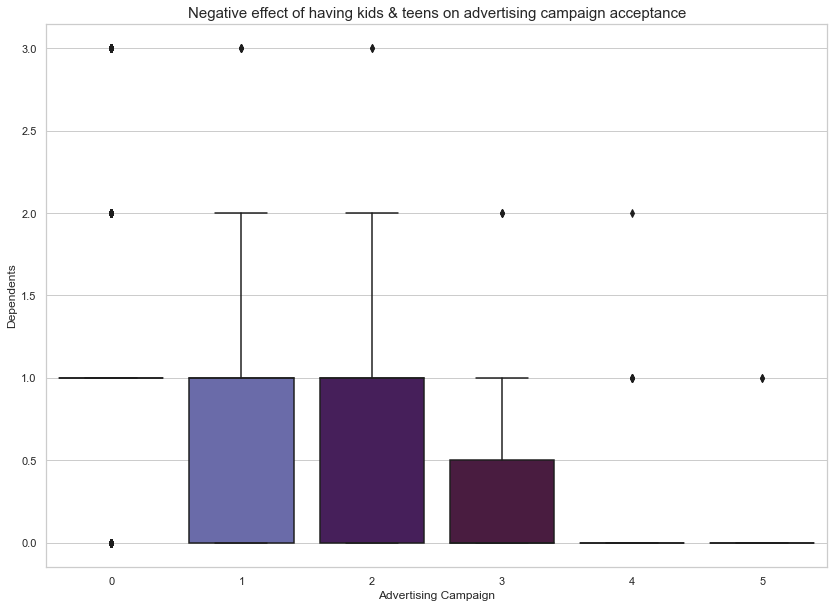

In [52]:
plt.figure(figsize=(14,10))
sns.boxplot(x='total_cam_acc', y='dependents', data=data, palette='twilight')
plt.xlabel('Advertising Campaign')
plt.ylabel('Dependents')
plt.title('Negative effect of having kids & teens on advertising campaign acceptance', fontsize=15)
plt.show()

_Plot illustrating the effect of age on spending_

<Figure size 864x432 with 0 Axes>

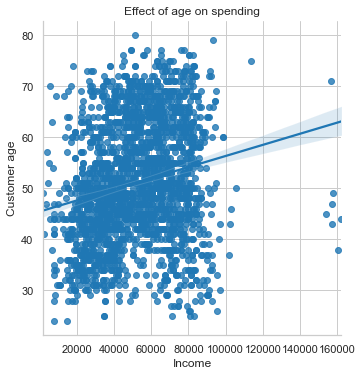

In [53]:
plt.figure(figsize=(12,6))
sns.lmplot(x='income', y='age', data=data)
plt.xlabel('Income')
plt.ylabel('Customer age')
plt.title('Effect of age on spending')
plt.show()

_Plot illustrating the negative effect of num_web_visits_month and num_web_purchases_

<Figure size 864x432 with 0 Axes>

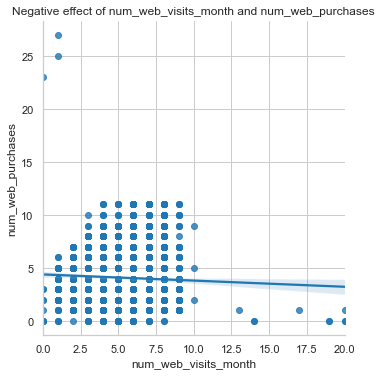

In [54]:
plt.figure(figsize=(12,6))
sns.lmplot(x='num_web_visits_month', y='num_web_purchases', data=data)
plt.xlabel('num_web_visits_month')
plt.ylabel('num_web_purchases')
plt.title('Negative effect of num_web_visits_month and num_web_purchases')
plt.show()

_Plot illustrating the positive effect of num_web_visits_month and num_deals_purchases_

<Figure size 864x432 with 0 Axes>

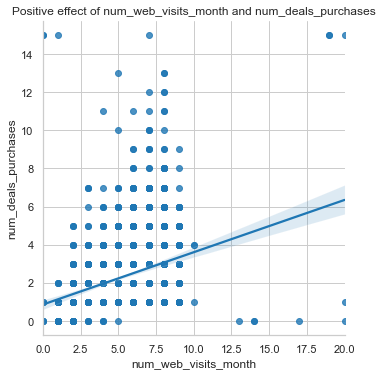

In [55]:
plt.figure(figsize=(12,6))
sns.lmplot(x='num_web_visits_month', y='num_deals_purchases', data=data)
plt.xlabel('num_web_visits_month')
plt.ylabel('num_deals_purchases')
plt.title('Positive effect of num_web_visits_month and num_deals_purchases')
plt.show()

Those two last plots above are interesting because number of web visits in the last month is not positively correlated with number of web purchases.

Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website.

## Section 02: Statistical Analysis

#### What factors are significantly related to the number of store purchases?

I will use use a `linear regression model` with `num_store_purchases` as the target variable, and then use machine learning  techniques to get insights about which features predict the number of store purchases.

Begin by plotting the target variable: `num_store_purchases`

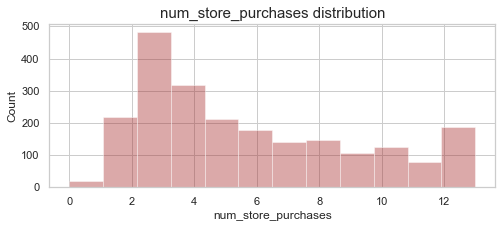

In [56]:
plt.figure(figsize=(8,3))
sns.distplot(data['num_store_purchases'], kde=False, hist=True, bins=12, color='Brown')
plt.title('num_store_purchases distribution', fontsize=15)
plt.xlabel('num_store_purchases')
plt.ylabel('Count')
plt.show()

Drop uninformative features like `id` and  `dt_customer` will be dropped in favor of using engineered variable year_customer

In [57]:
data.drop(columns=['id', 'dt_customer'], inplace=True)

Perform `one-hot encoding` of categorical features. 

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
# get categorical features and review number of unique values

cat = data.select_dtypes(exclude=np.number)

print("Number of unique values per categorical feature:\n", cat.nunique())

Number of unique values per categorical feature:
 education         5
marital_status    8
country           8
age_groups        6
dtype: int64


In [60]:
# use one hot encoder

enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

In [61]:
# merge with numeric data

num = data.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)

In [62]:
df2.head()

,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,...,accepted_cmp1,accepted_cmp2,response,complain,age,dependents,year_customer,total_mnt,total_purchases,total_cam_acc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,50.0,0.0,2014.0,1190.0,15.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,59.0,0.0,2014.0,577.0,18.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,62.0,1.0,2014.0,251.0,11.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53.0,2.0,2014.0,11.0,4.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,31.0,1.0,2014.0,91.0,8.0,2.0


To deal with an `error` input contains nan infinity or a value too large for dtype('float64') I will fill any missing values in df2 using method `ffill`

In [63]:
df2 = df2.fillna(method='ffill')

Fit linear regression model to training data (80% of dataset) and evaluate predictions on test data (20% of dataset) using `RMSE`

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
# isolate x and y variable

x= df2.drop(columns='num_store_purchases')
y = df2['num_store_purchases']

In [66]:
# perform train-test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [67]:
# LinearRegression model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [68]:
# build predictions

predictions = model.predict(x_test)

In [69]:
# evaluate model using RMSE

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  6.122029713839084e-11
Median value of target variable:  5.0


**Note:** The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions.

Identify features that `significantly` affect the number of store purchases, using `permutation importance`

**Eli5:** is a Python package which helps to debug machine learning classifiers and explain their predictions. `Eli5` allows to explain weights and predictions of scikit-learn linear classifiers and regressors, print decision trees as text or as SVG, show feature importances and explain predictions of decision trees and tree-based ensembles. 

[Click](https://eli5.readthedocs.io/en/latest/overview.html) for more information about Eli5

In [70]:
import eli5
from eli5.sklearn import PermutationImportance

permutation = PermutationImportance(model, random_state=1).fit(x_test, y_test)
eli5.show_weights(permutation, feature_names = x_test.columns.tolist(), top=10)

Weight,Feature
11.5504 ± 1.0345,total_purchases
1.9142 ± 0.1593,num_catalog_purchases
1.4677 ± 0.0960,num_web_purchases
0.5767 ± 0.0399,num_deals_purchases
0 ± 0.0000,age_groups_40 to 49
0 ± 0.0000,country_SA
0 ± 0.0000,country_IND
0 ± 0.0000,country_GER
0 ± 0.0000,country_CA
0 ± 0.0000,age_groups_30 to 39


**Significant features:**
   * total_purchases
   * num_catalog_purchases
   * num_web_purchases
   * num_deals_purchases

Explore this significant values using `SHAP` and vizualized them. 

**SHAP:** (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

[Click](https://shap.readthedocs.io/en/latest/) for more information about SHAP

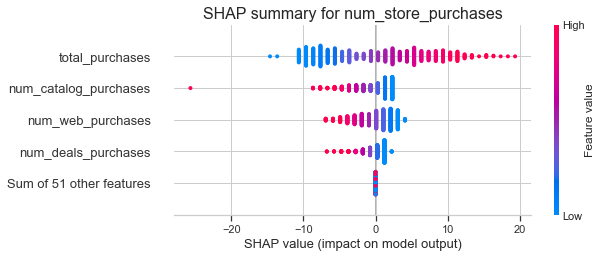

In [71]:
import shap

# calculate shap values 
ex = shap.Explainer(model, x_train)
shap_values = ex(x_test)

# plot
plt.title('SHAP summary for num_store_purchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5)
plt.show()

**Conclusion:**
  * The number of store purchases increases with higher number of total purchases ('total_purchases')
  * The number of store purchases decreases with higher number of catalog, web, or deals purchases ('num_catalog_purchases', 'num_web_purchases', 'num_deals_purchases')
  * Customers who buy in store are less likely to buy using catalog, web or special deals

#### Does US fare significantly better than the Rest of the World in terms of total purchases?

To answer this question, I will tabulate the total purchases of each country. Then, I will visualize this information for US as compared to the rest of the world.

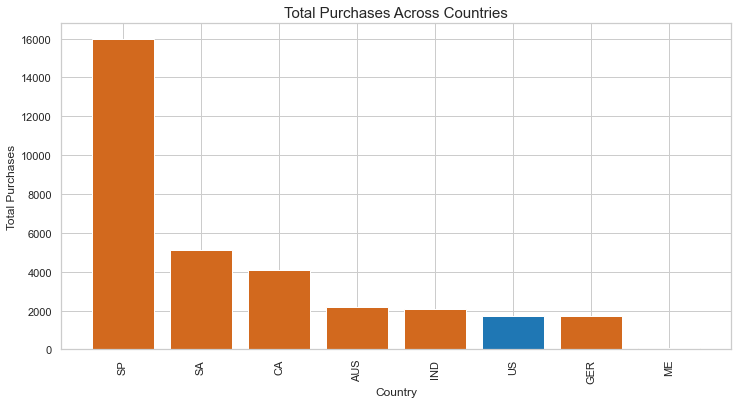

In [72]:
total_purchase = data.loc[:,['total_purchases','country']]
total_purchase = total_purchase.groupby('country').sum().sum(axis=1)

total_purchase = total_purchase.sort_values(ascending=False)
plt.figure(figsize=(12, 6)) 
plt.bar(total_purchase.index, total_purchase, color='Chocolate')
plt.bar('US', total_purchase['US'])
plt.xticks(rotation=90)
plt.title('Total Purchases Across Countries', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Total Purchases')
plt.show()

  * Spain (SP) has the highest number of purchases
  * US is third to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

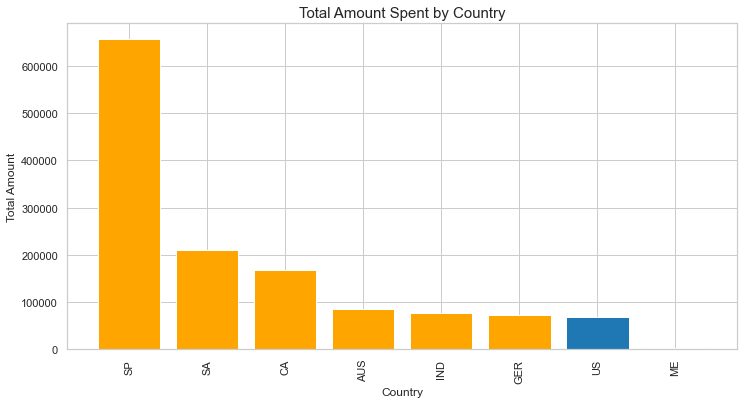

In [73]:
total_amount = data.loc[:,['total_mnt','country']]
total_amount = total_amount.groupby('country').sum().sum(axis=1)

total_amount = total_amount.sort_values(ascending=False)
plt.figure(figsize=(12, 6)) 
plt.bar(total_amount.index, total_amount, color='Orange')
plt.bar('US', total_amount['US'])
plt.xticks(rotation=90)
plt.title('Total Amount Spent by Country', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.show()

  * Spain (SP) has the highest amount spent on purchases
  * US is second to last, therefore the US does not fare better than the rest of the world in terms of the total amount spent on purchases

**Conclusion:** I can conclude with certainty that US does not fare better than the rest of the world in terms of total purchases or total amount spent on purchases. 

#### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.

First I will plot two variables: `mnt_gold_prods` and `num_store_purchases`

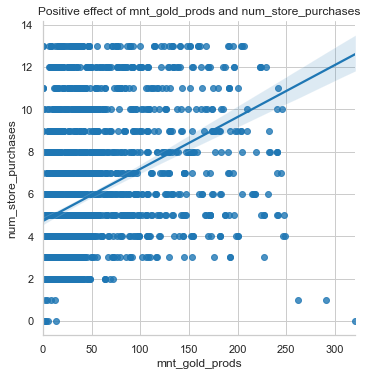

In [74]:
sns.lmplot(x='mnt_gold_prods', y='num_store_purchases', data=data)
plt.xlabel('mnt_gold_prods')
plt.ylabel('num_store_purchases')
plt.title('Positive effect of mnt_gold_prods and num_store_purchases')
plt.show()

From plot above we can noticed that there is positive correlations between those two variables.

**The question now is it statistically significant?**

First I need to test whether a sample differs from a normal distribution so I performed `normaltest` from stats.scipy

In [75]:
# Normality test 
from scipy.stats import normaltest

_, p_val_gold = normaltest(data['mnt_gold_prods'])
_, p_val_purchases = normaltest(data['num_store_purchases'])

alpha = 0.05

norm_test = pd.DataFrame({'p_value':[p_val_gold, p_val_purchases]}, index=['mnt_gold_prods', 'num_store_purchases'])
norm_test['Normality'] = norm_test.p_value.apply(lambda x: 'Rejected' if x < alpha else 'Accepted')

display(norm_test.style
        .set_caption('Normality test with confidence at 95%')
        .set_properties(width=data))

,p_value,Normality
mnt_gold_prods,0.000000,Rejected
num_store_purchases,0.000000,Rejected


The null hypothesis says that value comes from a normal distribution and it can be rejected after performing normality test so the second step is to perform `Kendall's test` to find out the correlation.

In [76]:
# Kendall test 
from scipy.stats import kendalltau

corr, p_val = kendalltau(data['mnt_gold_prods'], data['num_store_purchases'])
ken_test  = pd.DataFrame({'value':[corr, p_val]}, index=['Kendall Tau Correlation', 'p_value'])

display(ken_test.style
        .set_caption('Kendall Tau Test')
        .set_properties(width=data))

,value
Kendall Tau Correlation,0.392679
p_value,0.000000


Values close to `1` indicate `strong agreement`, and values close to `-1` indicate `strong disagreement`.

I found moderate agreements that this two values are correlated.

##### Hypothesis Testing

Does it exist a statistical evidence that people who spent an above average amount on gold in the last 2 years would have more in store purchases?

  * **NULL HYPOTHESIS:** people who spent an above average amount on gold in the last 2 years have not spent more in store purchases
  * **ALTERNATIVE HYPOTHESIS:** people who spent an above average amount on gold in the last 2 years have spent more in store purchases

I will perform `2-sample T-Test` 

In [77]:
from scipy.stats import ttest_ind

aplha = 0.05 # significant level

t_stat, p_val = ttest_ind(data['mnt_gold_prods'], data['num_store_purchases'])
result = ('significant:\nPeople who spent an above average amount on gold have spent more in store purchases' 
          if (p_val/2 < alpha) & (t_stat > 0) else 
          'not significant:\nThere is no evidence that people who spent an above average amount on gold have spent more in store purchases')


two_test  = pd.DataFrame({'value':[alpha, p_val, t_stat]}, index=['Significance level', 'p_value', 't-statistic'])

print(f'\n2-sample t-test is {result}\n')

display(two_test.style
        .set_caption('2 sample T-test results')
        .set_properties(width=data))


2-sample t-test is significant:
People who spent an above average amount on gold have spent more in store purchases



,value
Significance level,0.050000
p_value,0.000000
t-statistic,34.604468


With a p_val equal to `2.0007292708255e-232` I can rejected null hypothesis in favor of alternative hypothesis.

Based on the hypothesis test, I can conclude that store purchases of people who spend more on gold is greater than store purchases of people who spend less on gold.

Thus, the supervisor's claim is justified.

#### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)

I will compare `mnt_fish_products` between `Married PhD candidates` and all other customers

To do this I will sum the marital status married and phd dummy variables from df2 and Married+PhD group will have number 2

In [78]:
df2['Married_PhD'] = df2['marital_status_Married'] + df2['education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

Now I will plot `mnt_fish_products` between `Married_PhD` and others

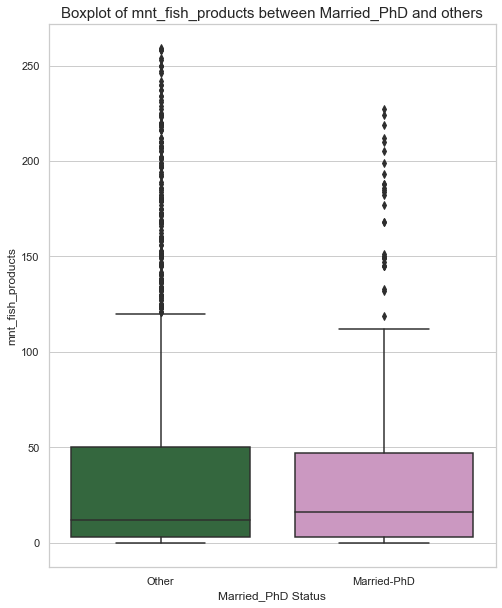

In [79]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Married_PhD', y='mnt_fish_products', data=df2, palette='cubehelix')
plt.xlabel('Married_PhD Status')
plt.ylabel('mnt_fish_products')
plt.title('Boxplot of mnt_fish_products between Married_PhD and others', fontsize=15)
plt.show()

From boxplot above we can see that `Married+PhD` candidates does not spent more on fish product then others **but the question was do "Married PhD candidates" have a significant relation with amount spent on fish?** To answer I will perform `hypothesis testing` like I did before.

  * **NULL HYPOTHESIS:** Married+PhD does not spent statistically significant more on fish products
  * **ALTERNATIVE HYPOTHESIS:** Married+PhD does spent statistically significant more on fish products

I will perform `2-sample T-Test`

In [80]:
aplha = 0.05 # significant level

t_stat, p_val = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['mnt_fish_products'], df2[df2['Married_PhD'] == 'Other']['mnt_fish_products'])
result = ('significant:\nMarried+PhD spent significant more on fish products.' 
          if (p_val/2 < alpha) & (t_stat > 0) else 
          'not significant:\nThere is no evidence that Married+PhD spent significant more on fish products.')


two_test  = pd.DataFrame({'value':[alpha, p_val, t_stat]}, index=['Significance level', 'p_value', 't-statistic'])

print(f'\n2-sample t-test is {result}\n')

display(two_test.style
        .set_caption('2 sample T-test results')
        .set_properties(width=df2))


2-sample t-test is not significant:
There is no evidence that Married+PhD spent significant more on fish products.



,value
Significance level,0.050000
p_value,0.205435
t-statistic,1.266587


Now I will drop `Married_PhD` column from df2, to include only the orginal variables in the analysis below

In [81]:
df2.drop(columns='Married_PhD', inplace=True)

The second part of this task was to answer the question: **What other factors are significantly related to amount spent on fish?**

I will use a linear regression model with `mnt_fish_products` as the target variable, and then use machine learning techniques to get insights about which features predict the number of store purchases.

Begin by plotting the target variable: `mnt_fish_products`

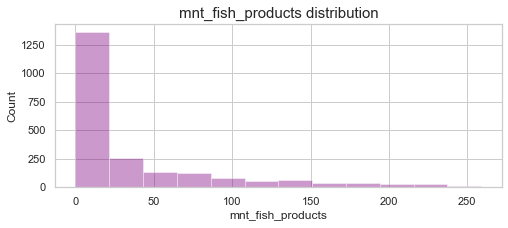

In [82]:
plt.figure(figsize=(8,3))
sns.distplot(data['mnt_fish_products'], kde=False, hist=True, bins=12, color='Purple')
plt.title('mnt_fish_products distribution', fontsize=15)
plt.xlabel('mnt_fish_products')
plt.ylabel('Count')
plt.show()

Fit linear regression model to training data (80% of dataset) and evaluate predictions on test data (20% of dataset) using `RMSE`

In [83]:
# isolate x and y variable

x = df2.drop(columns='mnt_fish_products')
y = df2['mnt_fish_products']

In [84]:
# perform train-test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [85]:
# LinearRegression model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [86]:
# build predictions

predictions = model.predict(x_test)

In [87]:
# evaluate model using RMSE

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  6.067752864526618e-13
Median value of target variable:  12.0


**Note:** The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions.

Identify features that significantly affect the number of store purchases, using `permutation importance`

In [88]:
permutation = PermutationImportance(model, random_state=1).fit(x_test, y_test)
eli5.show_weights(permutation, feature_names = x_test.columns.tolist(), top=10)

Weight,Feature
238.4475 ± 22.7381,total_mnt
67.9315 ± 3.5890,mnt_wines
32.0618 ± 3.9352,mnt_meat_products
1.7709 ± 0.3107,mnt_gold_prods
1.0952 ± 0.1223,mnt_fruits
0.9948 ± 0.0663,mnt_sweet_products
0 ± 0.0000,country_SP
0 ± 0.0000,age_groups_40 to 49
0 ± 0.0000,country_IND
0 ± 0.0000,country_ME


**Significant features:**
  * total_mnt
  * mnt_wines
  * mnt_meat_products
  * mnt_gold_prods
  * mnt_fruits
  * mnt_sweet_products

Explore this significant values using `SHAP` and vizualized them.

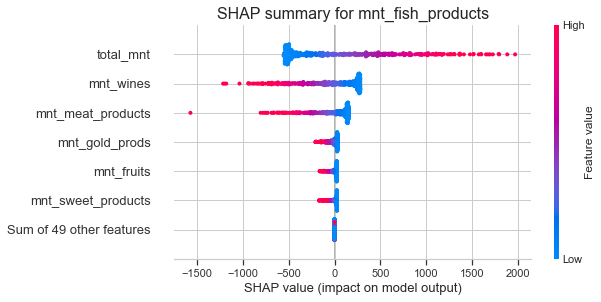

In [89]:
# calculate shap values 
ex = shap.Explainer(model, x_train)
shap_values = ex(x_test)

# plot
plt.title('SHAP summary for mnt_fish_products', size=16)
shap.plots.beeswarm(shap_values, max_display=7)
plt.show()

**Conclusion:**
  * The total amount spent on fish products increases with higher number of total_mnt
  * The total amount spent on fish products decreases with with higher number of: mnt_wines, mnt_meat_products, mnt_gold_prods, mnt_fruits, mnt_sweet_products
  * Customers who buy more wines, meat, gold, fruits and sweet products are less likely to buy more fish products

#### Is there a significant relationship between geographical regional and success of a campaign?

To answer this question I will perform a `random forest classifier` to the data, to predict response to the various campaigns (6 different models will be fit). The algorithm will rate each feature importance with a coefficient, based on the reduction effect on entropy.

Then, I will plot the feature importance scores, and then the feature importance scores for the country variables will be studied to determine if there is a significant relationship to campaign success.

**Note:** To improve readability of further analysis and visualization I will change the order of columns in df2 and put country columns in the end of df2.

In [90]:
cols = df2.columns.tolist()
cols = cols[-35:] + cols[:-35]
df2 = df2[cols]

In [91]:
df2.head()

,age_groups_20 to 29,age_groups_30 to 39,age_groups_40 to 49,age_groups_50 to 59,age_groups_60 to 69,age_groups_70 and Older,year_birth,income,kidhome,teenhome,...,marital_status_Widow,marital_status_YOLO,country_AUS,country_CA,country_GER,country_IND,country_ME,country_SA,country_SP,country_US
0,0.0,0.0,0.0,0.0,0.0,1.0,1970.0,84835.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1961.0,57091.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1958.0,67267.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1967.0,32474.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1989.0,21474.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
from sklearn.ensemble import RandomForestClassifier

# Target variable "Response", which is also the latest campaign

x = df2.drop([ 'response'], axis=1)
y = df2['response']

# define the model
model = RandomForestClassifier(n_estimators=100, criterion="entropy")

# fit the model
model.fit(x, y)

# get importance
importance = model.feature_importances_

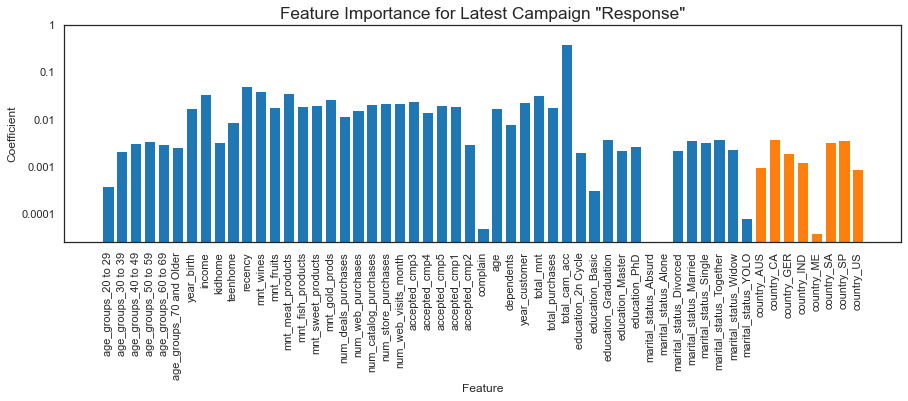

In [93]:
# summarize feature importance
sns.set_style('white')
plt.figure(figsize=(15, 4)) 
plt.bar(x.columns[:-8], importance[:-8])
plt.bar(x.columns[-8:], importance[-8:])
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks([10**(-i) for i in range(5)], [str(10**(-i)) for i in range(5)])
plt.title('Feature Importance for Latest Campaign "Response"', fontsize='x-large')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [94]:
# Target variable "accepted_cmp5", which is the fifth campaign

x = df2.drop([ 'accepted_cmp5'], axis=1)
y = df2['accepted_cmp5']

# define the model
model = RandomForestClassifier(n_estimators=100, criterion="entropy")

# fit the model
model.fit(x, y)

# get importance
importance = model.feature_importances_

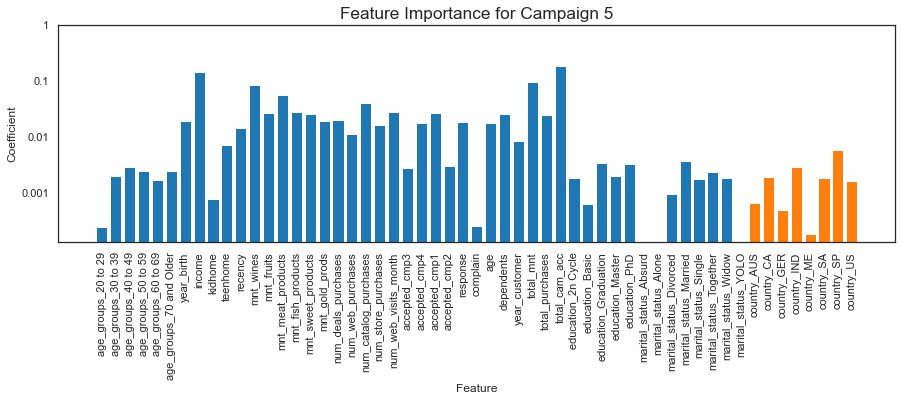

In [95]:
plt.figure(figsize=(15, 4)) 
plt.bar(x.columns[:-8], importance[:-8])
plt.bar(x.columns[-8:], importance[-8:])
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks([10**(-i) for i in range(4)], [str(10**(-i)) for i in range(4)])
plt.title('Feature Importance for Campaign 5', fontsize='x-large')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [96]:
# Target variable "accepted_cmp4", which is the fourth campaign

x = df2.drop([ 'accepted_cmp4'], axis=1)
y = df2['accepted_cmp4']

# define the model
model = RandomForestClassifier(n_estimators=100, criterion="entropy")

# fit the model
model.fit(x, y)

# get importance
importance = model.feature_importances_

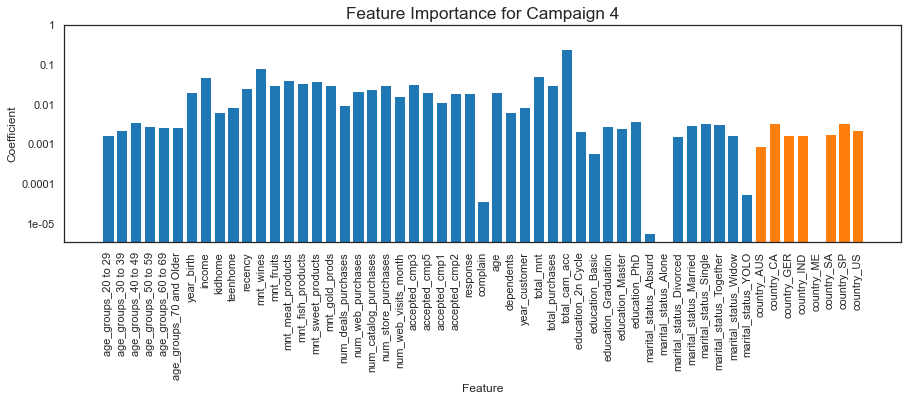

In [97]:
plt.figure(figsize=(15, 4)) 
plt.bar(x.columns[:-8], importance[:-8])
plt.bar(x.columns[-8:], importance[-8:])
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks([10**(-i) for i in range(6)], [str(10**(-i)) for i in range(6)])
plt.title('Feature Importance for Campaign 4', fontsize='x-large')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [98]:
# Target variable "accepted_cmp3", which is the third campaign

x = df2.drop([ 'accepted_cmp3'], axis=1)
y = df2['accepted_cmp3']

# define the model
model = RandomForestClassifier(n_estimators=100, criterion="entropy")

# fit the model
model.fit(x, y)

# get importance
importance = model.feature_importances_

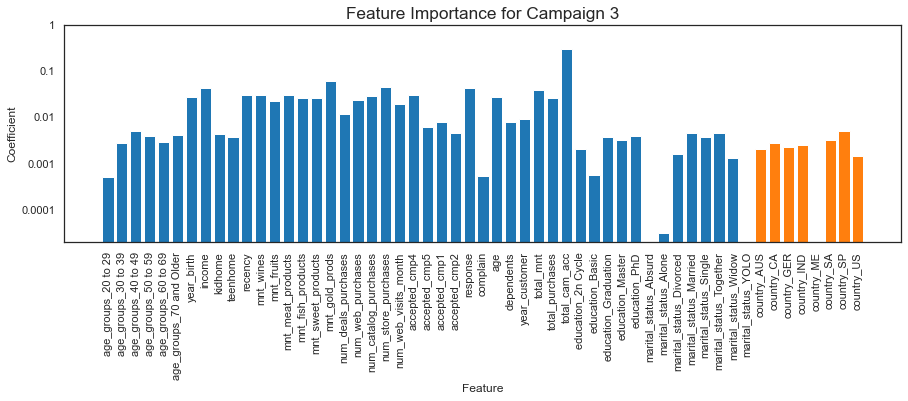

In [99]:
plt.figure(figsize=(15, 4)) 
plt.bar(x.columns[:-8], importance[:-8])
plt.bar(x.columns[-8:], importance[-8:])
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks([10**(-i) for i in range(5)], [str(10**(-i)) for i in range(5)])
plt.title('Feature Importance for Campaign 3', fontsize='x-large')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [100]:
# Target variable "accepted_cmp2", which is the second campaign

x = df2.drop([ 'accepted_cmp2'], axis=1)
y = df2['accepted_cmp2']

# define the model
model = RandomForestClassifier(n_estimators=100, criterion="entropy")

# fit the model
model.fit(x, y)

# get importance
importance = model.feature_importances_

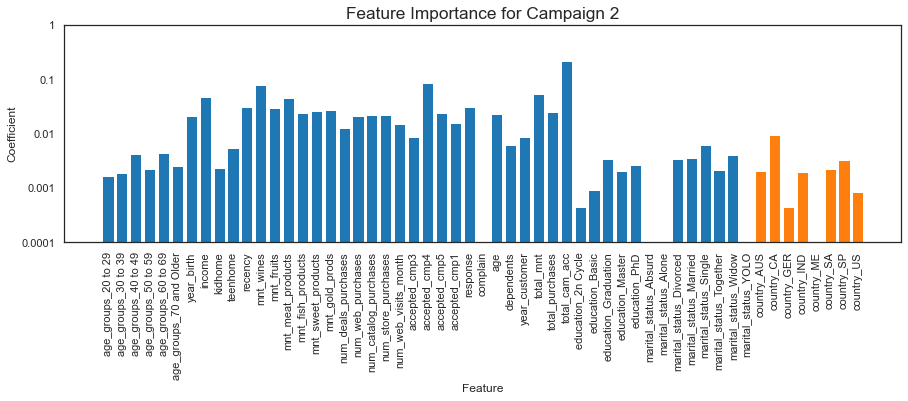

In [101]:
plt.figure(figsize=(15, 4)) 
plt.bar(x.columns[:-8], importance[:-8])
plt.bar(x.columns[-8:], importance[-8:])
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks([10**(-i) for i in range(5)], [str(10**(-i)) for i in range(5)])
plt.title('Feature Importance for Campaign 2', fontsize='x-large')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [102]:
# Target variable "accepted_cmp1", which is the first campaign

x = df2.drop([ 'accepted_cmp1'], axis=1)
y = df2['accepted_cmp1']

# define the model
model = RandomForestClassifier(n_estimators=100, criterion="entropy")

# fit the model
model.fit(x, y)

# get importance
importance = model.feature_importances_

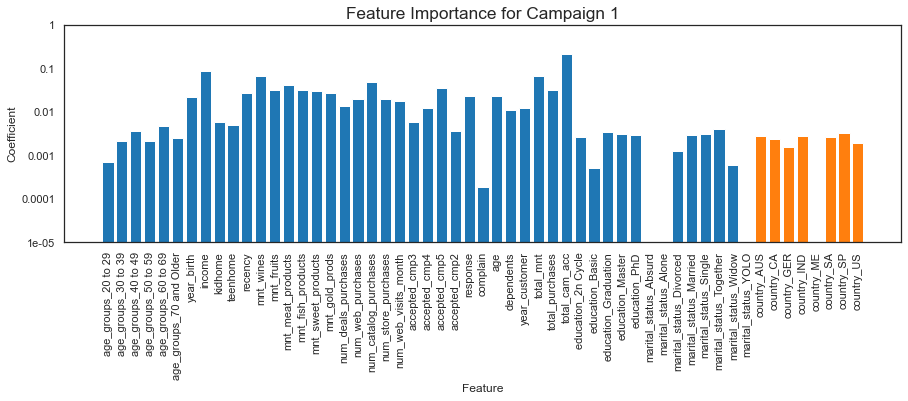

In [103]:
plt.figure(figsize=(15, 4)) 
plt.bar(x.columns[:-8], importance[:-8])
plt.bar(x.columns[-8:], importance[-8:])
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks([10**(-i) for i in range(6)], [str(10**(-i)) for i in range(6)])
plt.title('Feature Importance for Campaign 1', fontsize='x-large')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

**Note:** For all bar graphs above I use a logarithmic scale for better readability. 

**Conclusion:**
  * Based on the `feature importance plots` for each of the campaigns, it can be observed that the `country` variables - split by each country separetely tend to have very small coefficients, meaning that they are less important in predicting campaign success as compared to other features.
  * `Answering the main question there are not statistically significant relationship between geographical regional and success of a campaign`.

I can further verify this by plotting the campaign `acceptance rate` across different countries.

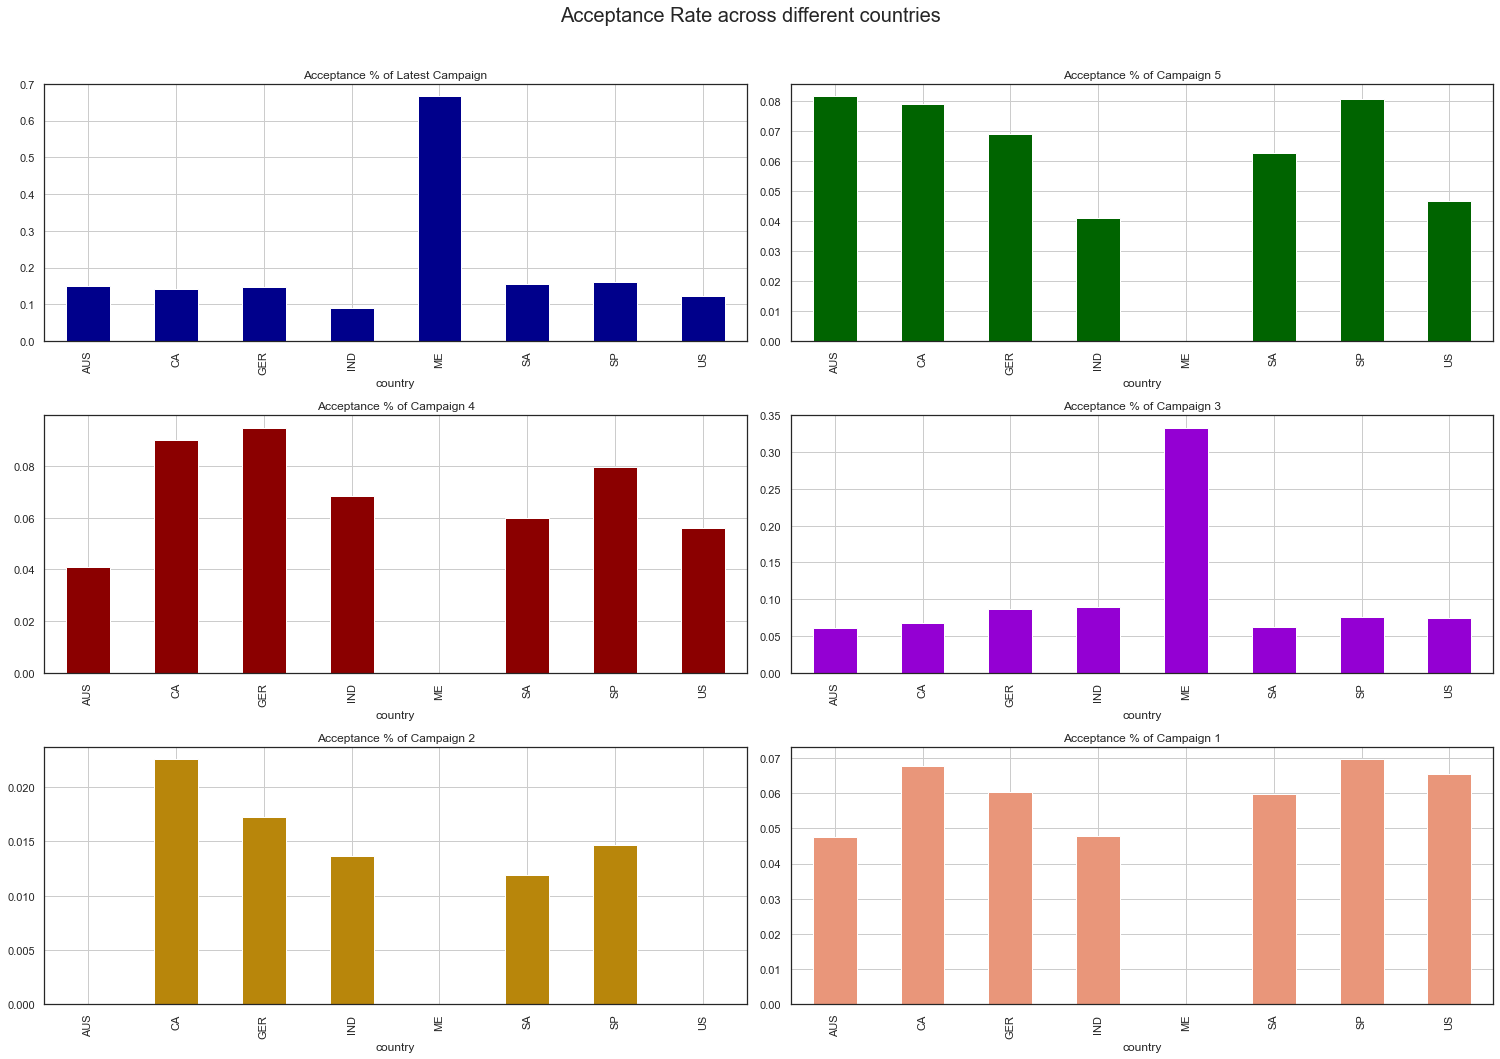

In [104]:
campaign = data.loc[:,['response','accepted_cmp1','accepted_cmp2','accepted_cmp3','accepted_cmp4','accepted_cmp5','country']]
campaign = campaign.groupby('country').mean()

f, axs = plt.subplots(3,2,figsize=(21,14))
sns.set_style('whitegrid')
sns.set_context('notebook', 1)

campaign['response'].plot(kind='bar', ax=axs[0,0], color='DarkBlue')
axs[0,0].title.set_text('Acceptance % of Latest Campaign')

campaign['accepted_cmp5'].plot(kind='bar', ax=axs[0,1], color='DarkGreen')
axs[0,1].title.set_text('Acceptance % of Campaign 5')

campaign['accepted_cmp4'].plot(kind='bar', ax=axs[1,0], color='DarkRed')
axs[1,0].title.set_text('Acceptance % of Campaign 4')

campaign['accepted_cmp3'].plot(kind='bar', ax=axs[1,1], color='DarkViolet')
axs[1,1].title.set_text('Acceptance % of Campaign 3')

campaign['accepted_cmp2'].plot(kind='bar', ax=axs[2,0], color='DarkGoldenRod')
axs[2,0].title.set_text('Acceptance % of Campaign 2')

campaign['accepted_cmp1'].plot(kind='bar', ax=axs[2,1], color='DarkSalmon')
axs[2,1].title.set_text('Acceptance % of Campaign 1')

plt.suptitle('Acceptance Rate across different countries', y=1.05, fontsize=20)
plt.tight_layout()
plt.show()

From the plot above, we can see that the acceptance rate (%) of each campaign across the various countries tend to be quite low.

Thus, it makes sense and further supports our conclusion that `country` is not a significant feature to predict campaign success.

**Note:** In dataset are only 3 entries for Mexico. Thus, acceptance rate for this country is bigger that for others. If 1 customer accepted a campaign it makes that acceptance rate is 33%.

## Section 03: Data Visualization

#### Which marketing campaign is most successful?

I will plot marketing campaign overall acceptance rates

In [110]:
# calculate success rate (percent accepted)

cam_success = pd.DataFrame(data[['accepted_cmp1', 'accepted_cmp2', 'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'response']].mean()*100, 
                           columns=['Percent']).reset_index()


In [113]:
cam_success.head(6)

,index,Percent
0,accepted_cmp1,6.419530
1,accepted_cmp2,1.356239
2,accepted_cmp3,7.368897
3,accepted_cmp4,7.414105
4,accepted_cmp5,7.278481
5,response,15.054250


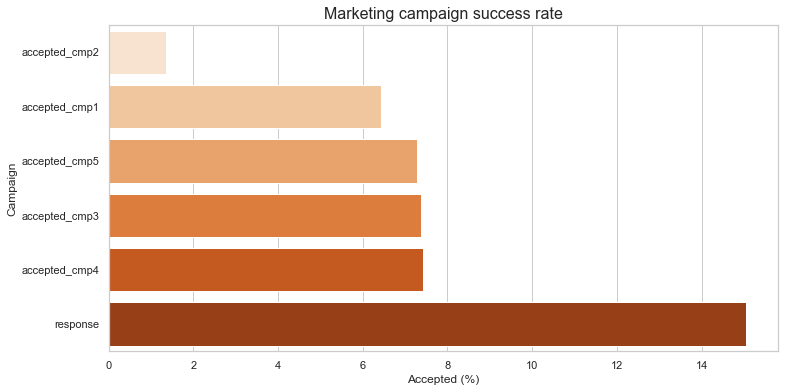

In [115]:
plt.figure(figsize=(12,6))
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Oranges')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

Based on the graph, I can conclude that the most recent campaign - `response` is the most successful one with marketing success rate at `15.05%`

#### What does the average customer look like for this company?

I will average across each qualitative variables, and take the modal category of all categorical variables to obtain the average customer for this company.

In [122]:
average_customer = data.mean()

average_customer = pd.DataFrame(average_customer)

modal = data.mode().transpose().loc[['country','education','marital_status', 'age_groups']]

average_customer = average_customer.append(modal)

display(average_customer.style
        .set_caption('Average Customer looks')
        .set_properties(width=average_customer))

,0
year_birth,1968.913653
income,51958.810579
kidhome,0.441682
teenhome,0.505877
recency,49.019439
mnt_wines,305.287523
mnt_fruits,26.329566
mnt_meat_products,167.029837
mnt_fish_products,37.648734
mnt_sweet_products,27.046564


On average, a customer looks like this, divided into five categories:

**Demographic:**
  * Born between 1968 and 1969
  * Income $51959
  * Has 0.44 kids and 0.51 teens at home, on average 1 dependant at home
  * Married
  * Graduated (likely high school)
  * Country of origin: SP (Spain)
  * Average age is 51

**Loyalty:**
  * Became a customer in 2013
  * Made last purchase 49 days ago 

**Channels:**
  * Deals Purchases: 2.32
  * Web Purchases: 4.09
  * Catalog Purchases: 2.67
  * Store Purchases: 5.81
  * Number of Web Visits in last month: 5.32

**Expenditures:**
  * Wines: 305.29
  * Fruits: 26.33
  * Meat: 167.03
  * Fish: 37.65
  * Sweet: 27.05
  * Gold: 43.93
  * Total: 607.27

**Interactions:**
  * Complains: 0.01
  * Response: 0.15
  * Accepted Campaign 1: 0.064
  * Accepted Campaign 2: 0.014
  * Accepted Campaign 3: 0.074
  * Accepted Campaign 4: 0.074
  * Accepted Campaign 5: 0.073

#### Which products are performing best?

I will plot a bar plot for each products type based on the total amount sold in past 2 years. 

In [124]:
products = data.loc[:,['mnt_wines','mnt_fruits','mnt_meat_products','mnt_fish_products','mnt_sweet_products','mnt_gold_prods']]

products = products.sum().sort_values(ascending=False)

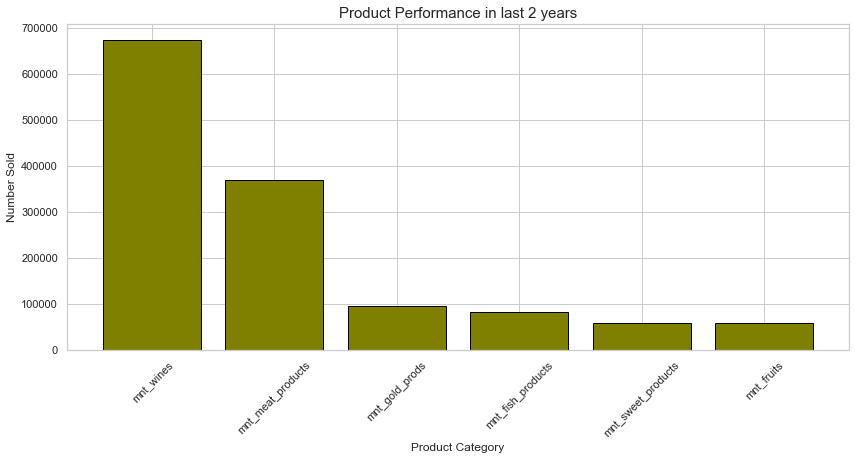

In [141]:
plt.figure(figsize=(14,6))
plt.bar(products.index, products, color='Olive', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Product Performance in last 2 years', size=15)
plt.xlabel('Product Category')
plt.ylabel('Number Sold')
plt.show()

**Conclusion:** 
  * Based on the graph above `wines` were the best performing product in last 2 years followed by meat product at second place. 
  * On the other hand gold, fishes, sweets and fruits products were less popular with similar  number sold in last 2 years. 

#### Which channels are underperforming?

I will plot a bar plot for each channel type based on the interactions in past 2 years.

**Note:** `num_web_visits_month` is excluded because this column contains data from last month, I need for my analysis data for past 2 years. 

In [143]:
channels = data.loc[:,['num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases']]

channels = channels.sum().sort_values(ascending=False)

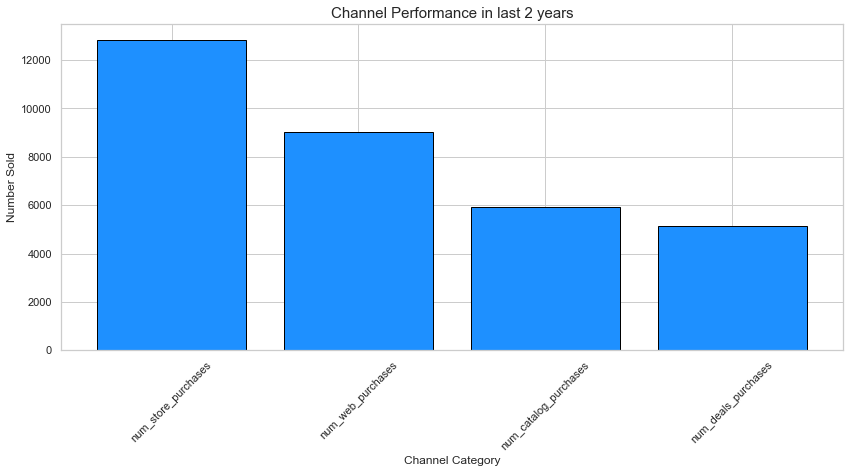

In [144]:
plt.figure(figsize=(14,6))
plt.bar(channels.index, channels, color='DodgerBlue', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Channel Performance in last 2 years', size=15)
plt.xlabel('Channel Category')
plt.ylabel('Number Sold')
plt.show()

**Conclusion:** 
  * As we can see the customers prefer to shop in store. This channel has the best performance and its followed by web and catalog purchases. 
  * `Underperforming channel is deals purchases` with the lowest performance presented at bar graph above.

## Section 04: CMO Recommendations

* The most successful campaign was the latest one - Response, and the acceptance rate in Mexico was above 60% which is the best result achieved. 

  * Company should conduct future advertising campaign using model already implemented in Mexico.

* Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids or teens.
  * Suggested action is to create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens.

* As was shown in this project the number of dependents is positively correlated with number of deals purchased.
   * Suggested action is to create a targeted advertising campaigns which offers more special deals to customer with dependants.

* As was shown in this project the number of web visits in last month is not positively correlated with number of web purchases. On average number of web visits was higher than web purchases, which means that some of web visits was not converted into web sales.
  * CMO should relook their website strategy. 

* The best performing products are wines and meats. On average customers spent the most on these items. 
  * Firstly CMO can add some more premium products to this categories, because there are some clients with income above $100,000,  who may be interested in such a purchuases.
  * Secondly CMO  can focus advertising campaigns on boosting sales of the less popular items like gold, fishes, sweets and fruits. 

* The best performing channel are store and web purchases. 
   * Focus advertising campaigns on the more successful channels can brings more new clients. 

* The underperforming channels are catalog and deals purchases.
    * CMO should relook at the strategy of catalog and deals purchases.

* On average making purchases take the customer 49 days. 
   * One of the goals of CMO decisions should be increases purchases frequency. It could be done by creating some new loyalty programs which encouraged customers to buy more often.